# LOANTAP

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

    Personal Loan
    EMI Free Loan
    Personal Overdraft
    Advance Salary Loan


## Problem Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

### Following are the analysis made in this notebook

- predicting Loan status using RFe selected features 

- Univariate and bivariate analysis

- Exploratory Data analaysis - data preprocesing , data cleaning , outlier detection and treatment

- Graphs like pairplots, distplot, heatmaps, boxplot, histogram to show the influence of features- independent variable and dependent variables

- Feature engineering, data visualization 

- ML model building with and without scaling the independent variables, With hyperparameter tuning

- ML model build using sklearn and stasmodel.

- Finding the VIF using RFE, and selecting the best feature for selection

- Recommendations & Observations

In [1]:
#impoorting Libraties

import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
import seaborn as sbn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#statastics 
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from matplotlib.ticker import FormatStrFormatter
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing

from sklearn.model_selection import train_test_split


from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency # categorical Vs categorical

# from scipy.stats import pearsonr, spearmanr # numeric Vs numeric

from scipy.stats import kstest # cdf

from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [104]:
## importing dataset

df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921")

In [3]:
# Printing first 5 rows in dataframe
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
90028,8875.0,36 months,12.12,295.29,B,B3,The Home Depot,10+ years,MORTGAGE,32000.0,...,6.0,0.0,6371.0,25.1,25.0,f,INDIVIDUAL,7.0,0.0,"0523 Bender Inlet Suite 142\r\nMillerville, OR..."
197087,11500.0,36 months,14.09,393.55,B,B5,"LOUIS MACCHIARULO,ESQ",10+ years,RENT,33000.0,...,15.0,0.0,20366.0,56.7,25.0,f,INDIVIDUAL,0.0,0.0,"1904 Hoffman Lock\r\nEast Dawn, AK 29597"
330983,6500.0,36 months,17.57,233.60,D,D4,Control System Specialist,9 years,MORTGAGE,158000.0,...,26.0,0.0,36429.0,84.1,83.0,w,INDIVIDUAL,6.0,0.0,"0649 Alyssa Burg\r\nJacquelinefurt, AR 05113"
348423,20000.0,60 months,16.29,489.45,D,D2,groundsman,10+ years,MORTGAGE,67000.0,...,21.0,0.0,5131.0,38.3,55.0,f,INDIVIDUAL,4.0,0.0,"03205 Wanda Causeway\r\nRodneyfurt, DC 22690"
324662,10000.0,36 months,13.67,340.18,B,B5,conductor,9 years,MORTGAGE,72000.0,...,20.0,0.0,20375.0,47.2,51.0,w,INDIVIDUAL,4.0,0.0,Unit 8055 Box 3960\r\nDPO AE 00813


In [5]:
# Shape of dataframe
df.shape

(396030, 27)

There are 396030 rows present in the data and 27 columns/features present in the dataset

In [6]:
# Columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
# Finding any null values present in dataset
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

We can see that there are missing values present in emp_title , emp_length , title , revol_util , mort_Acc , pub_rec_bankruptcies. So we will do the missing values treatment further

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [9]:
df.nunique().sort_values()

initial_list_status          2
term                         2
loan_status                  2
verification_status          3
application_type             3
home_ownership               6
grade                        7
pub_rec_bankruptcies         9
emp_length                  11
purpose                     14
pub_rec                     20
mort_acc                    33
sub_grade                   35
open_acc                    61
issue_d                    115
total_acc                  118
int_rate                   566
earliest_cr_line           684
revol_util                1226
loan_amnt                 1397
dti                       4262
annual_inc               27197
title                    48817
revol_bal                55622
installment              55706
emp_title               173105
address                 393700
dtype: int64

In [10]:
#Check for duplicates
df.duplicated().sum()

0

There are no duplicates present in the dataset

In [11]:
#Category columns
category_columns=df.dtypes=="O"
cat_cols= category_columns[category_columns].index
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [12]:
#Numerical columns
category_columns=df.dtypes!="O"
num_cols= category_columns[category_columns].index
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

### Value Counts in Dataset

In [13]:
columns = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status']
for col in columns:
  print("Value Counts in", col)
  print("")
  print(df[col].value_counts())
  print("-------"*20)

Value Counts in term

 36 months    302005
 60 months     94025
Name: term, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Value Counts in grade

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Value Counts in sub_grade

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64
-------------------

## Splitting pincode valuse

In [123]:
df['pincode']= df['address'].str.extract('.*(\d{5})', expand = False)

### Missing value imputation

In [14]:
##missing values in dataset

missing_values = pd.DataFrame({'Number of Missing Values':list(df.isnull().sum().values),
                               'Percentage of Missing Values':list(((df.isnull().sum()/len(df))*100).values)},
                                index=list(df.columns))
missing_values

,Number of Missing Values,Percentage of Missing Values
loan_amnt,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000
emp_title,22927,5.789208
emp_length,18301,4.621115
home_ownership,0,0.000000
annual_inc,0,0.000000


In [15]:
df['title']=df['title'].fillna(df['title'].mode()[0])
df['emp_title']=df['emp_title'].fillna(df['emp_title'].mode()[0])
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())
df['mort_acc']=df['mort_acc'].fillna(df['mort_acc'].median())
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())

In [16]:
## After fixing the missing datas

##missing values in dataset

missing_values = pd.DataFrame({'Number of Missing Values':list(df.isnull().sum().values),
                               'Percentage of Missing Values':list(((df.isnull().sum()/len(df))*100).values)},
                                index=list(df.columns))
missing_values

,Number of Missing Values,Percentage of Missing Values
loan_amnt,0,0.0
term,0,0.0
int_rate,0,0.0
installment,0,0.0
grade,0,0.0
sub_grade,0,0.0
emp_title,0,0.0
emp_length,0,0.0
home_ownership,0,0.0
annual_inc,0,0.0


WE have treated the missing values rows with median , if numerical value, else with mode , if categorical values

### Count of Numerical and categorical features present in the dataset

In [124]:
df['pincode'].value_counts()

70466    38538
22690    38462
30723    38289
48052    37829
00813    31130
         ...  
52817        1
67749        1
49563        1
04428        1
05891        1
Name: pincode, Length: 68021, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Count of Numerical and Categorical Features')

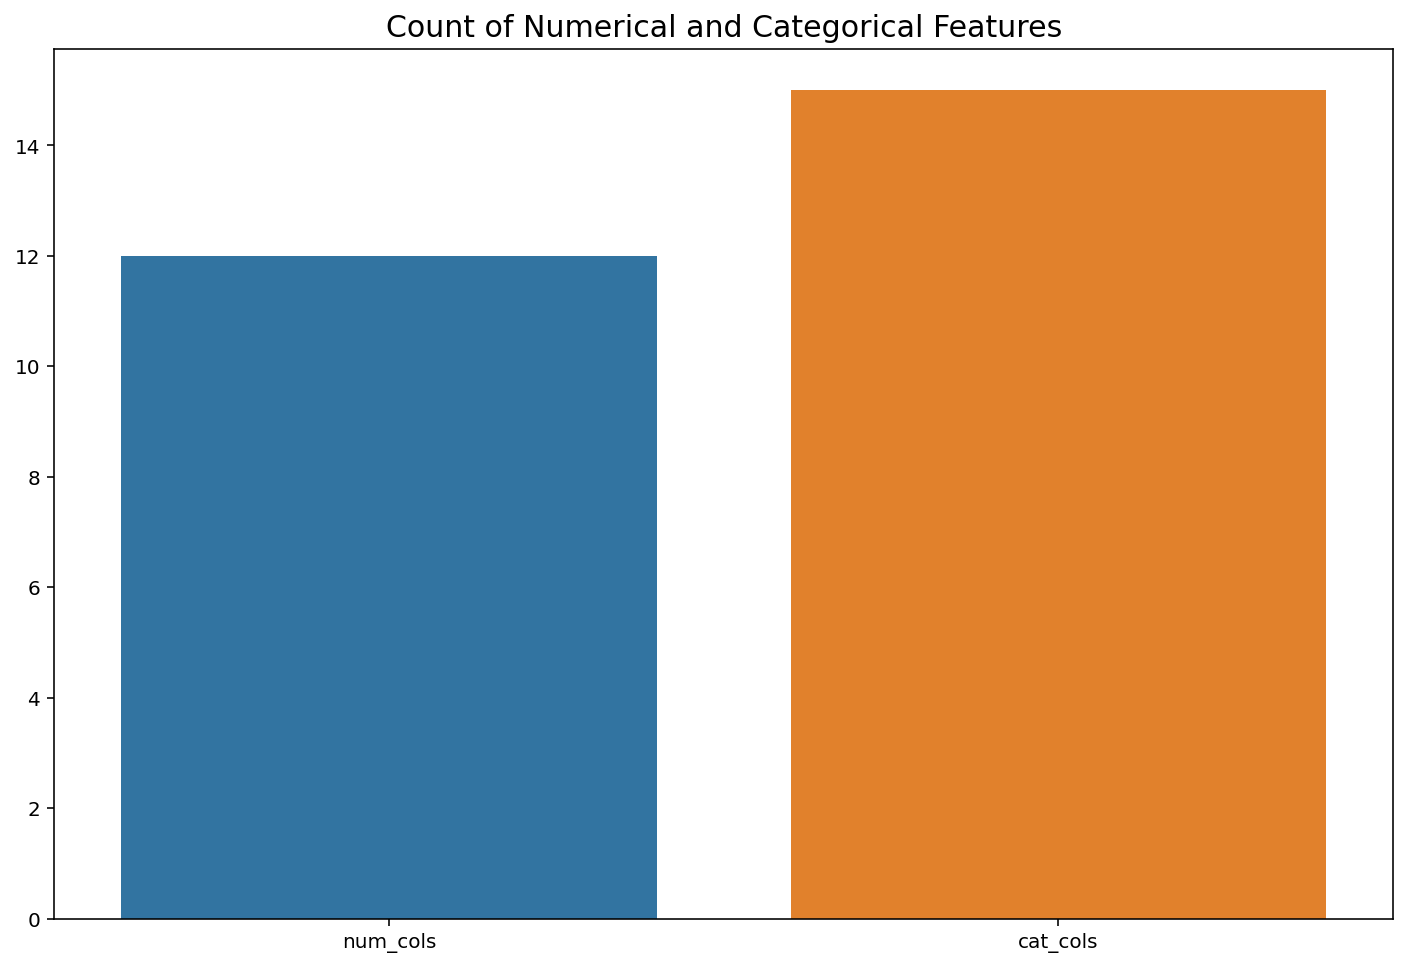

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x = ['num_cols','cat_cols'],y=[len(num_cols),len(cat_cols)])
plt.title('Count of Numerical and Categorical Features',fontsize=15)
plt.show()

## Analysing the target variable

In [18]:
df['loan_status'].sample(5)

284484     Fully Paid
99352      Fully Paid
69006      Fully Paid
232560     Fully Paid
250459    Charged Off
Name: loan_status, dtype: object

In [19]:
df['loan_status'].describe()

count         396030
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype: object

## Target variable encoding

In [20]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['target_loan_status'] = labelencoder.fit_transform(df['loan_status'])
df=df.drop(columns=['loan_status'])

In [21]:
# Since 'Chance of Admit' is target variable and already analyzed, lets remove it from num_columns
cat_cols=cat_cols.drop('loan_status')

### Heatmap

In [22]:
## Heatmap
df_copy = df.copy().corr()
fig = px.imshow(df_copy, text_auto=True, width=1500, height=800)
fig.show()

From the above heatmap, we can clearly see that the features like annual_income , mort_Acc , are correlatefd with the target_loan_status

## Univariate Analysis


### Distibution of data in Numerical columns

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'income vs loan_amnt')

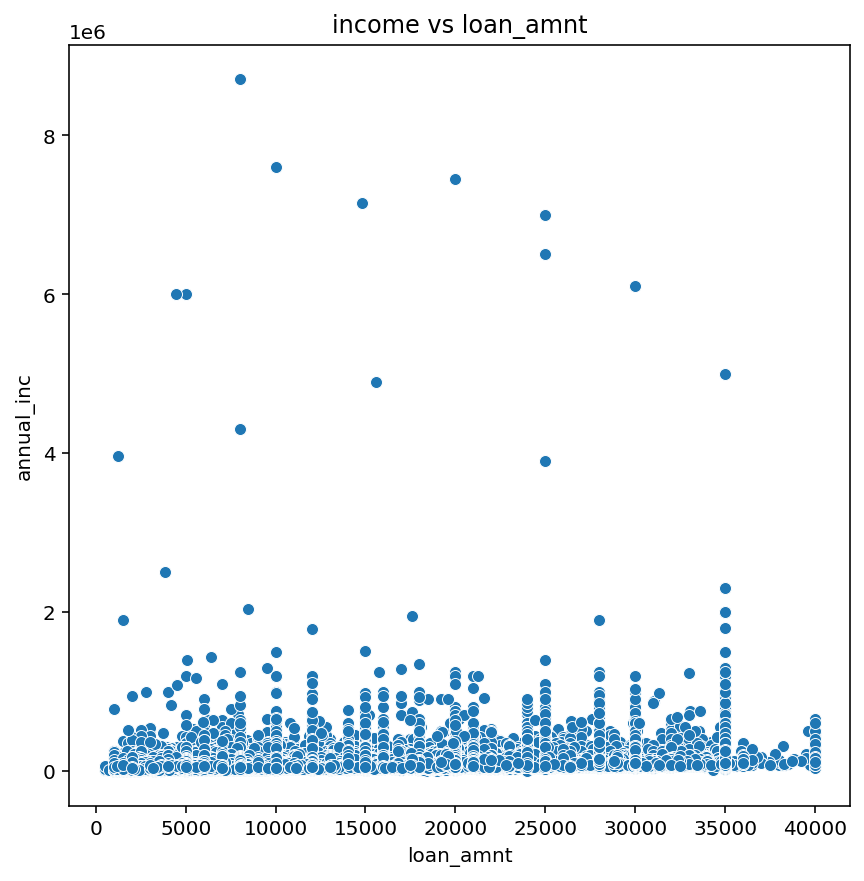

In [23]:
plt.figure(figsize=(7, 7))
fig=sns.scatterplot(x="loan_amnt",y="annual_inc",data=df)
plt.title("income vs loan_amnt")
plt.show()

From the above plot, we can see that the annual income , and loan amount is not correlated

<Figure size 1296x4320 with 0 Axes>

j=elks:: 0


Text(0.5, 1.0, 'loan_amnt')

Text(0.5, 1.0, 'loan_amnt Spread')

j=elks:: 1


Text(0.5, 1.0, 'int_rate')

Text(0.5, 1.0, 'int_rate Spread')

j=elks:: 2


Text(0.5, 1.0, 'installment')

Text(0.5, 1.0, 'installment Spread')

j=elks:: 3


Text(0.5, 1.0, 'annual_inc')

Text(0.5, 1.0, 'annual_inc Spread')

j=elks:: 4


Text(0.5, 1.0, 'dti')

Text(0.5, 1.0, 'dti Spread')

j=elks:: 5


Text(0.5, 1.0, 'open_acc')

Text(0.5, 1.0, 'open_acc Spread')

j=elks:: 6


Text(0.5, 1.0, 'pub_rec')

Text(0.5, 1.0, 'pub_rec Spread')

j=elks:: 7


Text(0.5, 1.0, 'revol_bal')

Text(0.5, 1.0, 'revol_bal Spread')

j=elks:: 8


Text(0.5, 1.0, 'revol_util')

Text(0.5, 1.0, 'revol_util Spread')

j=elks:: 9


Text(0.5, 1.0, 'total_acc')

Text(0.5, 1.0, 'total_acc Spread')

j=elks:: 10


Text(0.5, 1.0, 'mort_acc')

Text(0.5, 1.0, 'mort_acc Spread')

j=elks:: 11


Text(0.5, 1.0, 'pub_rec_bankruptcies')

Text(0.5, 1.0, 'pub_rec_bankruptcies Spread')

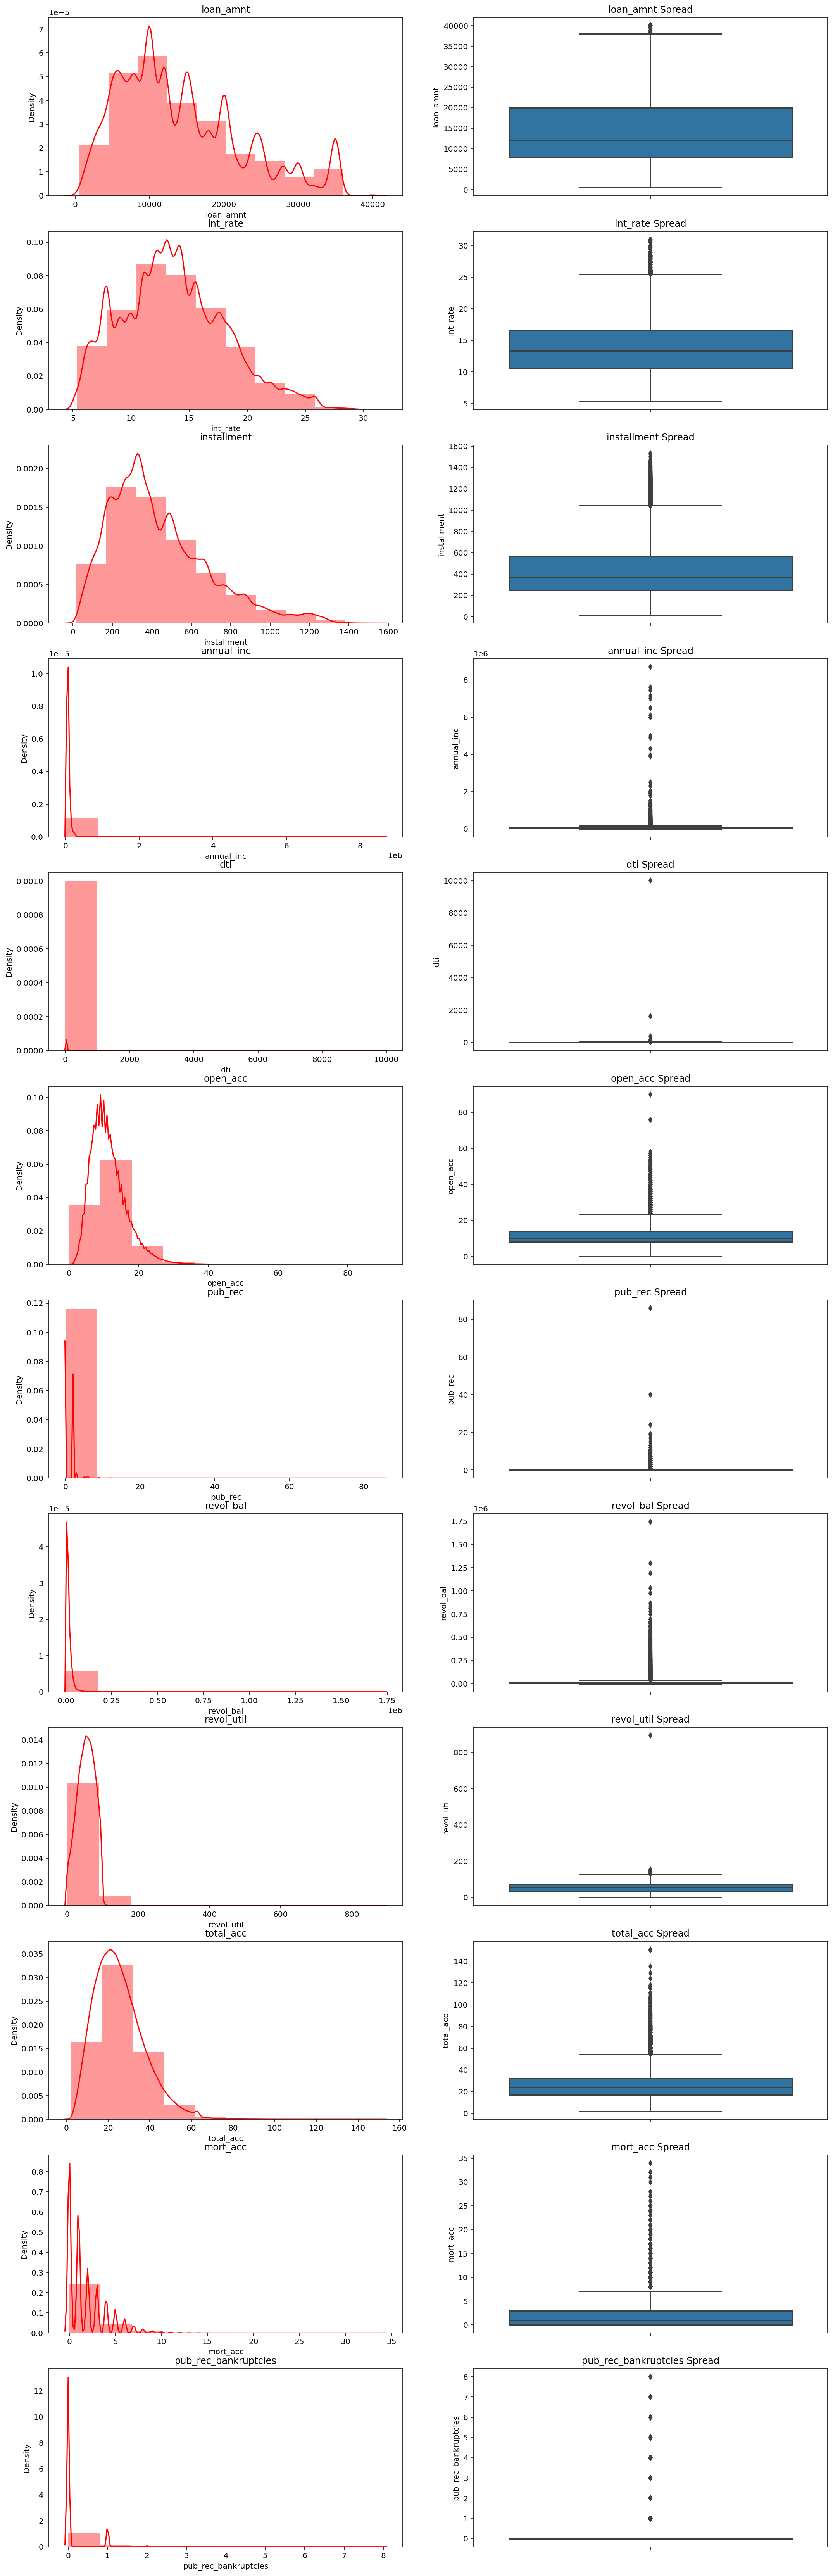

In [24]:
plt.figure(figsize=(18, 60))

cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies']
i=0
for j in range(len(cols)):
  for f in range(2):
    i=i+1
    if i==(len(cols)*2)+1:
      break
    elif i %2 !=0:
      print("j=elks::",j)
      plt.subplot(len(cols), 2, i)
      sns.distplot(df[cols[j]],bins=10, color ='red' ,kde=True)
      plt.title(cols[j])
    else:
      plt.subplot(len(cols), 2, i)
      plt.title(cols[j] + ' Spread')
      sns.boxplot(y=df[cols[j]])

### Outlier Treatment

['dti',
 'pub_rec',
 'mort_acc',
 'pub_rec_bankruptcies',
 'term',
 'grade',
 'home_ownership',
 'verification_status',
 'initial_list_status',
 'application_type']

In [105]:
# Outlier Treatment using IQR -

q1 = df['loan_amnt'].quantile(0.25)
q3 = df['loan_amnt'].quantile(0.75)
iqr = q3-q1
df = df[(df['loan_amnt']>(q1-1.5*iqr) ) & (df['loan_amnt']<(q3+1.5*iqr))]


q1 = df['dti'].quantile(0.25)
q3 = df['dti'].quantile(0.75)
iqr = q3-q1
df = df[(df['dti']>(q1-1.5*iqr) ) & (df['dti']<(q3+1.5*iqr))]

q1 = df['open_acc'].quantile(0.25)
q3 = df['open_acc'].quantile(0.75)
iqr = q3-q1
df = df[(df['open_acc']>(q1-1.5*iqr) ) & (df['open_acc']<(q3+1.5*iqr))]



## Removing unncessary columns


In [26]:
# WE can remove some of categroy columns , which is not necessary

df_a= df.drop(columns=['address','issue_d','title','earliest_cr_line','emp_title','application_type','pincode'])

#Category columns
category_columns=df_a.dtypes=="O"
cat_cols_a= category_columns[category_columns].index
cat_cols_a

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status'],
      dtype='object')

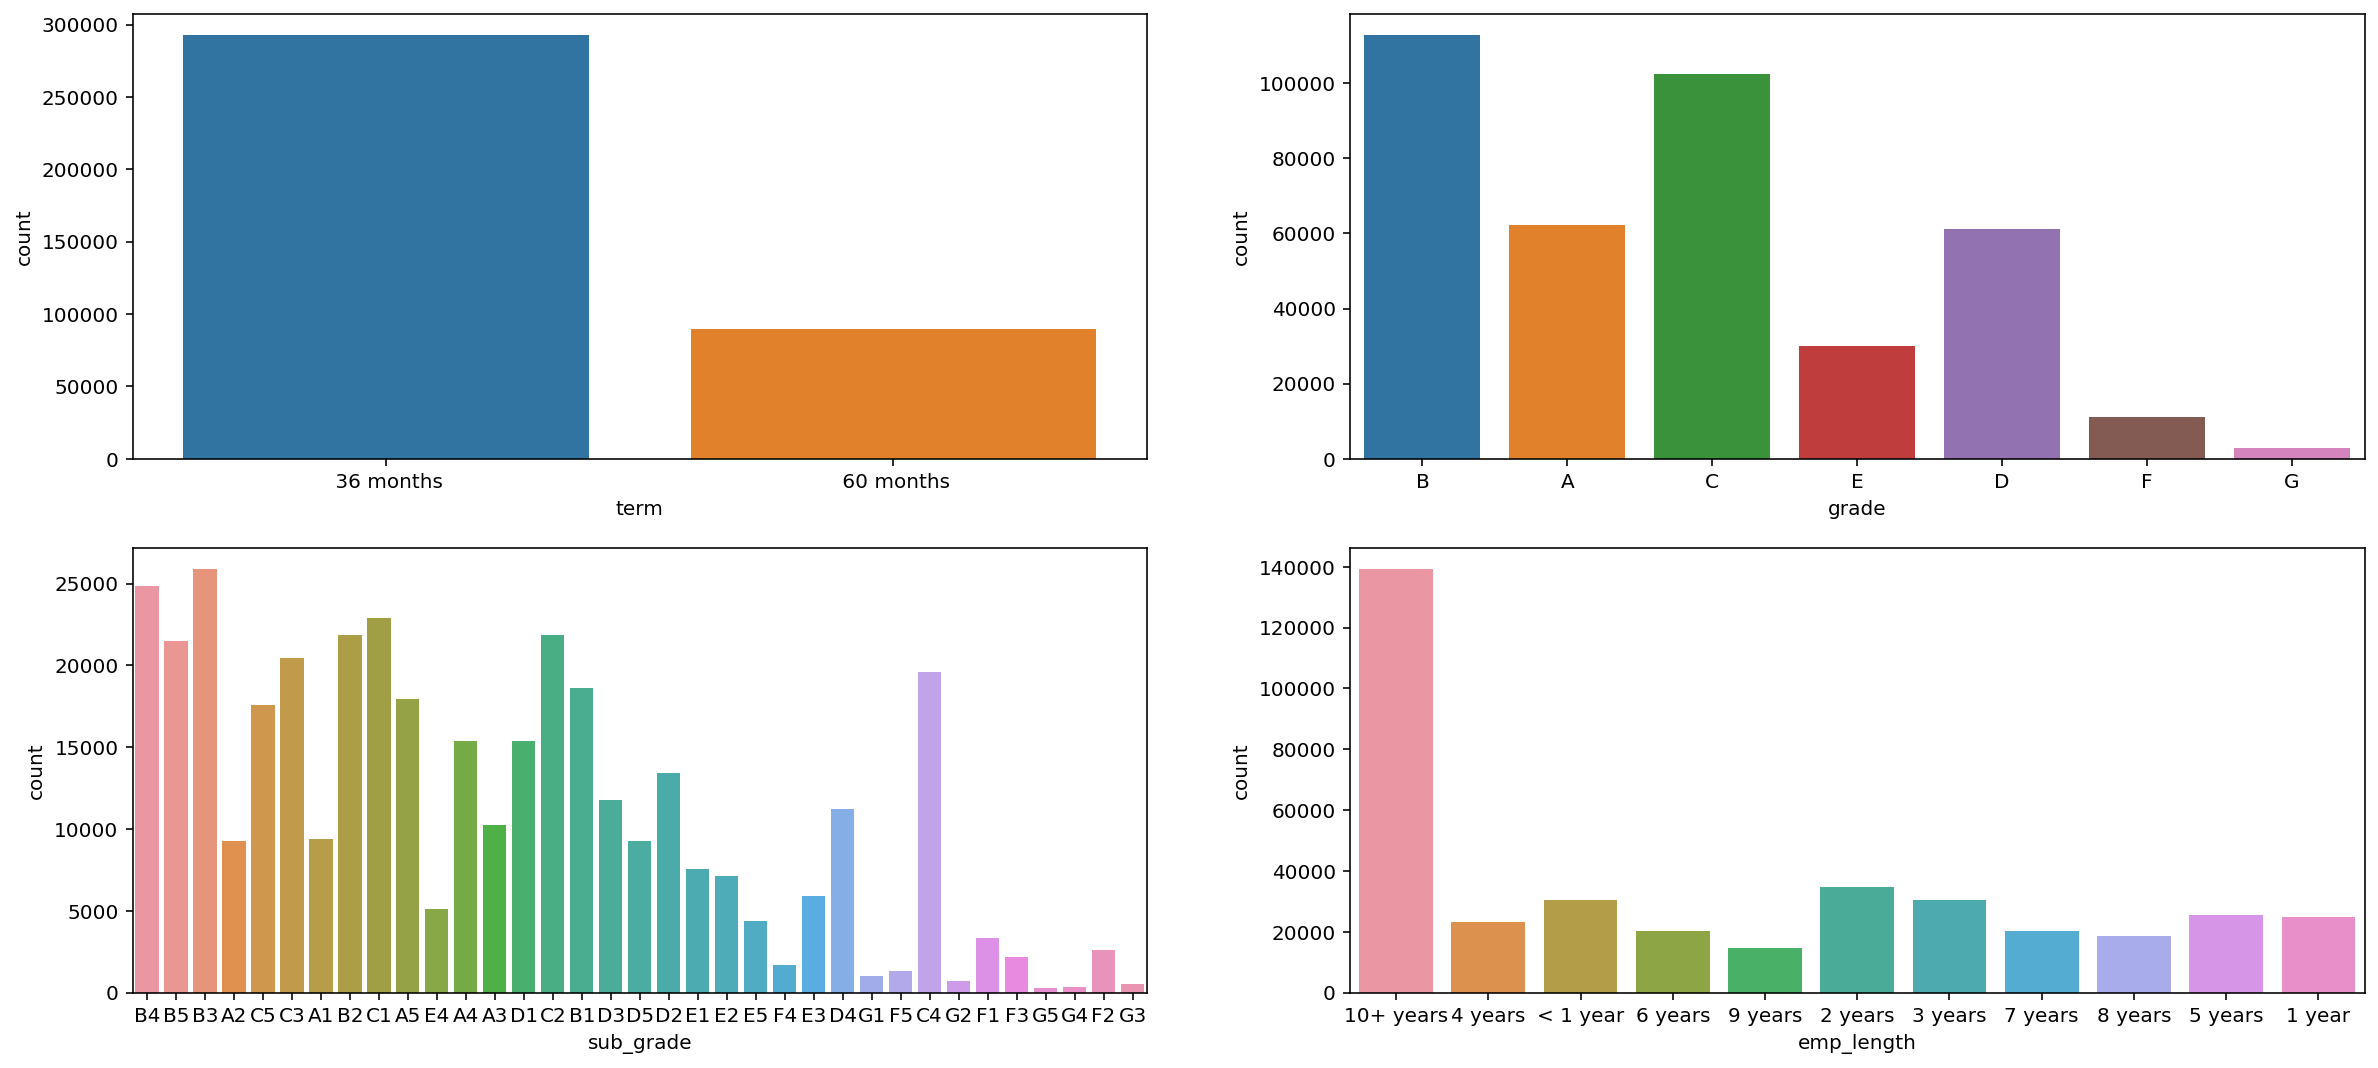

In [27]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 9))

i = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df_a, x=cat_cols_a[i], ax=axis[row, col])
        i += 1
        
plt.show()

From the above plots, 
- we can see that the grade A , has the highest in count , 
- And employment length of 10+ years , is more in the dataset, 
- And the sub_grade B3, is more in terms of count present in dataset. 
- Then the term 36 months is present in high count than 60 months  present in dataset

### RCparams boxplots

int_rate         AxesSubplot(0.125,0.657941;0.227941x0.222059)
annual_inc    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
dti           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dtype: object

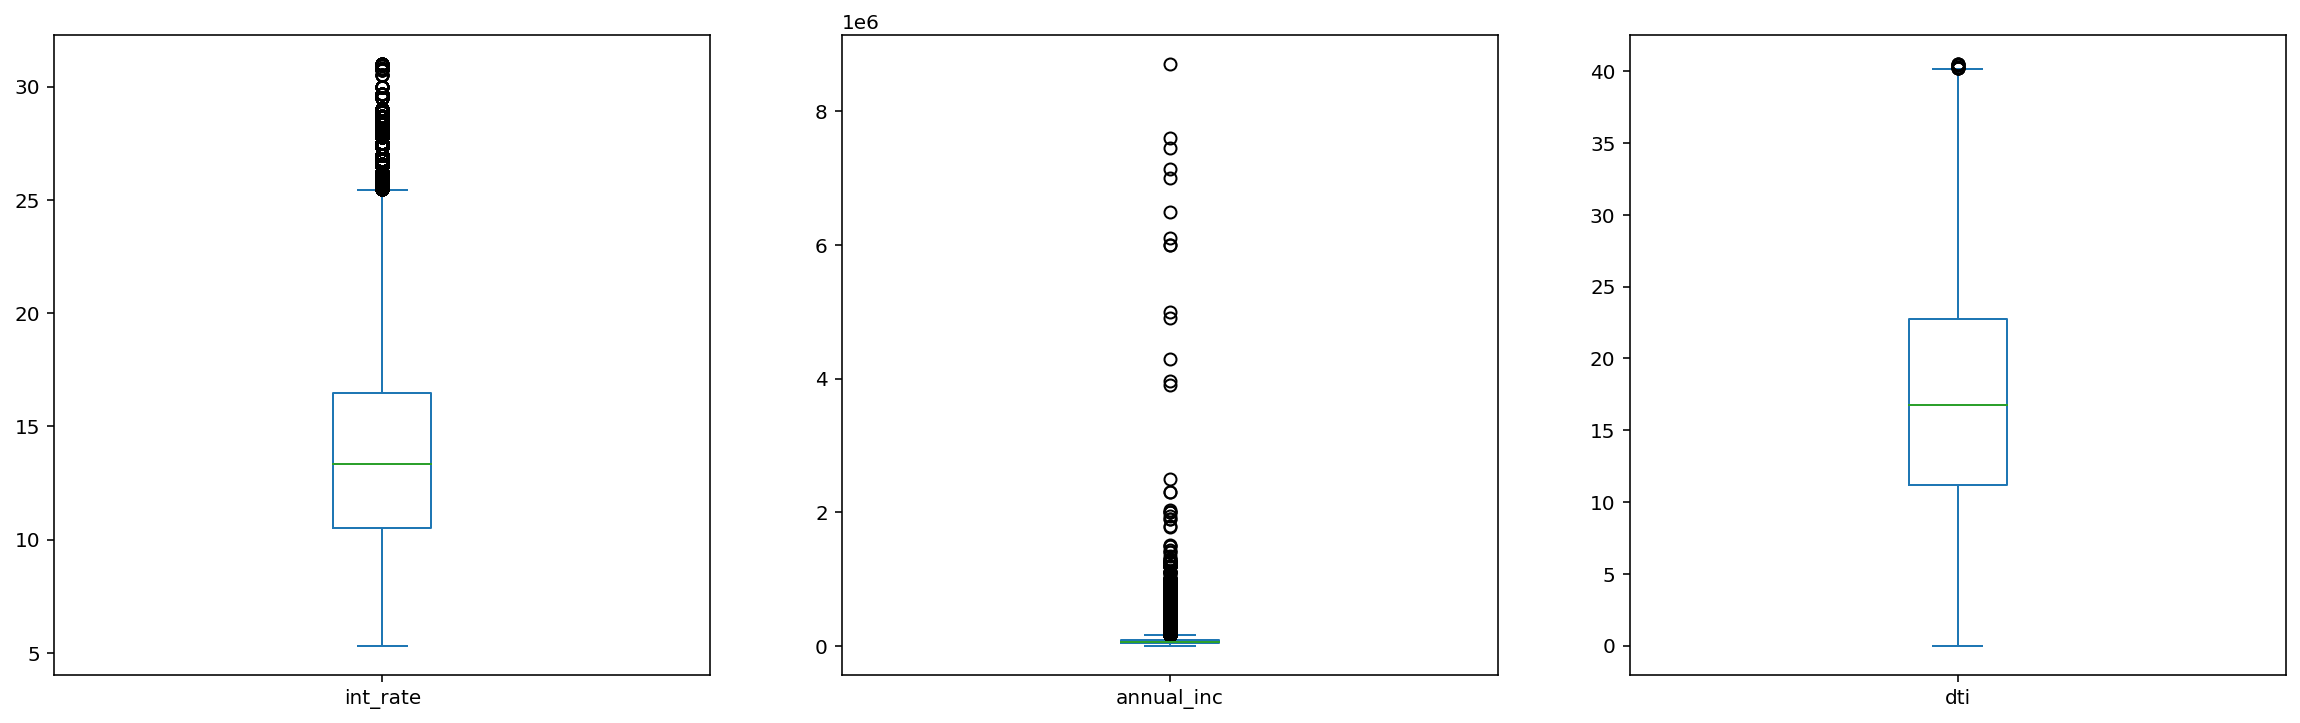

In [28]:
plt.rcParams["figure.figsize"] = [20,20]
df_num = df.select_dtypes(include=np.number)
df_num.iloc[:,[1,3,4]].plot(kind = "box",subplots = True,layout = (3,3))
plt.show()

### Distibution of loan_amt in the dataset

<Figure size 504x504 with 0 Axes>

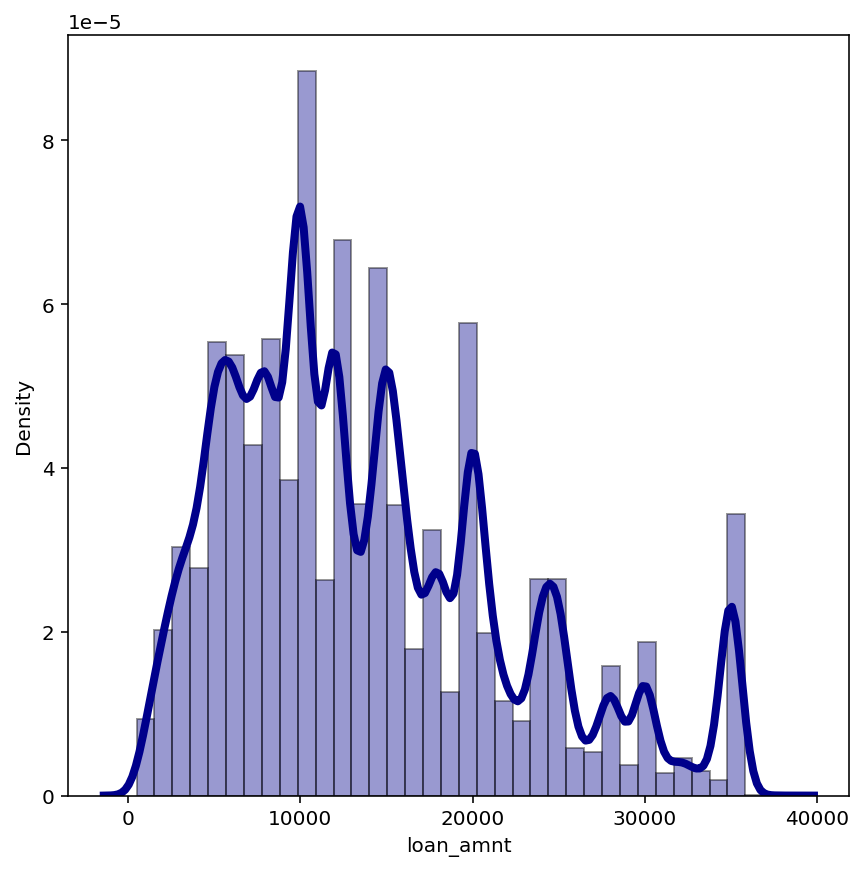

In [30]:
#loan_amt
plt.figure(figsize=(7, 7))
sns.distplot(df['loan_amnt'], hist=True, kde= True,
            bins =int(36), color ='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
plt.show()

We can see that the loan_amt doesnt follows any distibution , we can also check the distibution with log , exponential 

### Distibution of Total_Acc in the dataset

<Figure size 504x504 with 0 Axes>

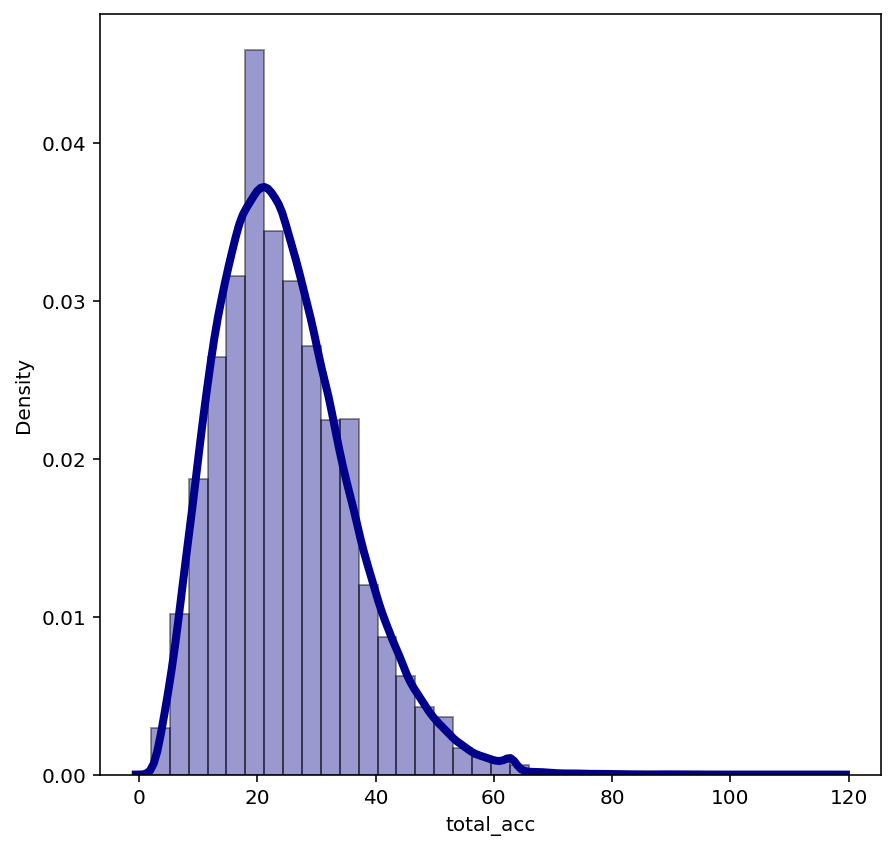

In [31]:
#total_acc
plt.figure(figsize=(7, 7))
sns.distplot(df['total_acc'], hist=True, kde= True,
            bins =int(36), color ='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
plt.show()

We can clearly see that the total_Acc , follows normal distibution

### Distibution of Installment in the dataset

<Figure size 504x504 with 0 Axes>

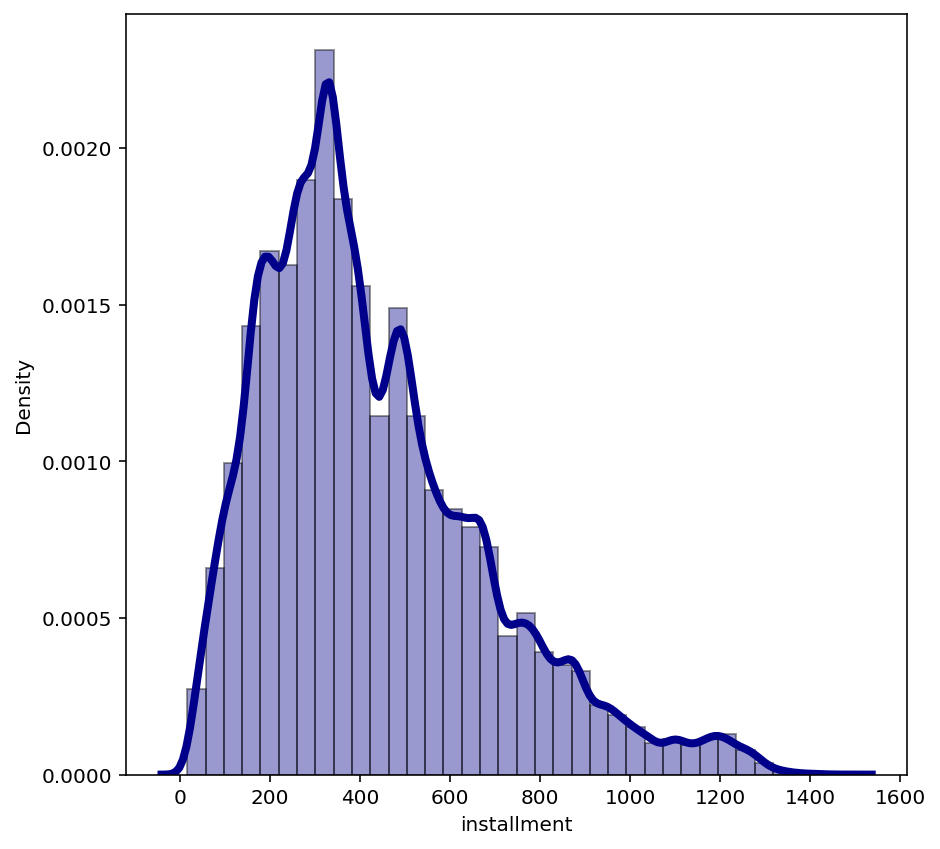

In [32]:
#installment
plt.figure(figsize=(7, 7))
sns.distplot(df['installment'], hist=True, kde= True,
            bins =int(36), color ='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
plt.show()

We can clearly see that the normal distibution is followed for installment data 

## Bivariate Analysis


In [33]:
term_36 = df[df['term'] == ' 36 months']['target_loan_status']
term_60 = df[df['term'] == ' 60 months']['target_loan_status']

Text(0.5, 1.0, "Distribution of 'loan_status' for 36 month")

Text(0.5, 1.0, "Distribution of 'loan_status' for 60 months")

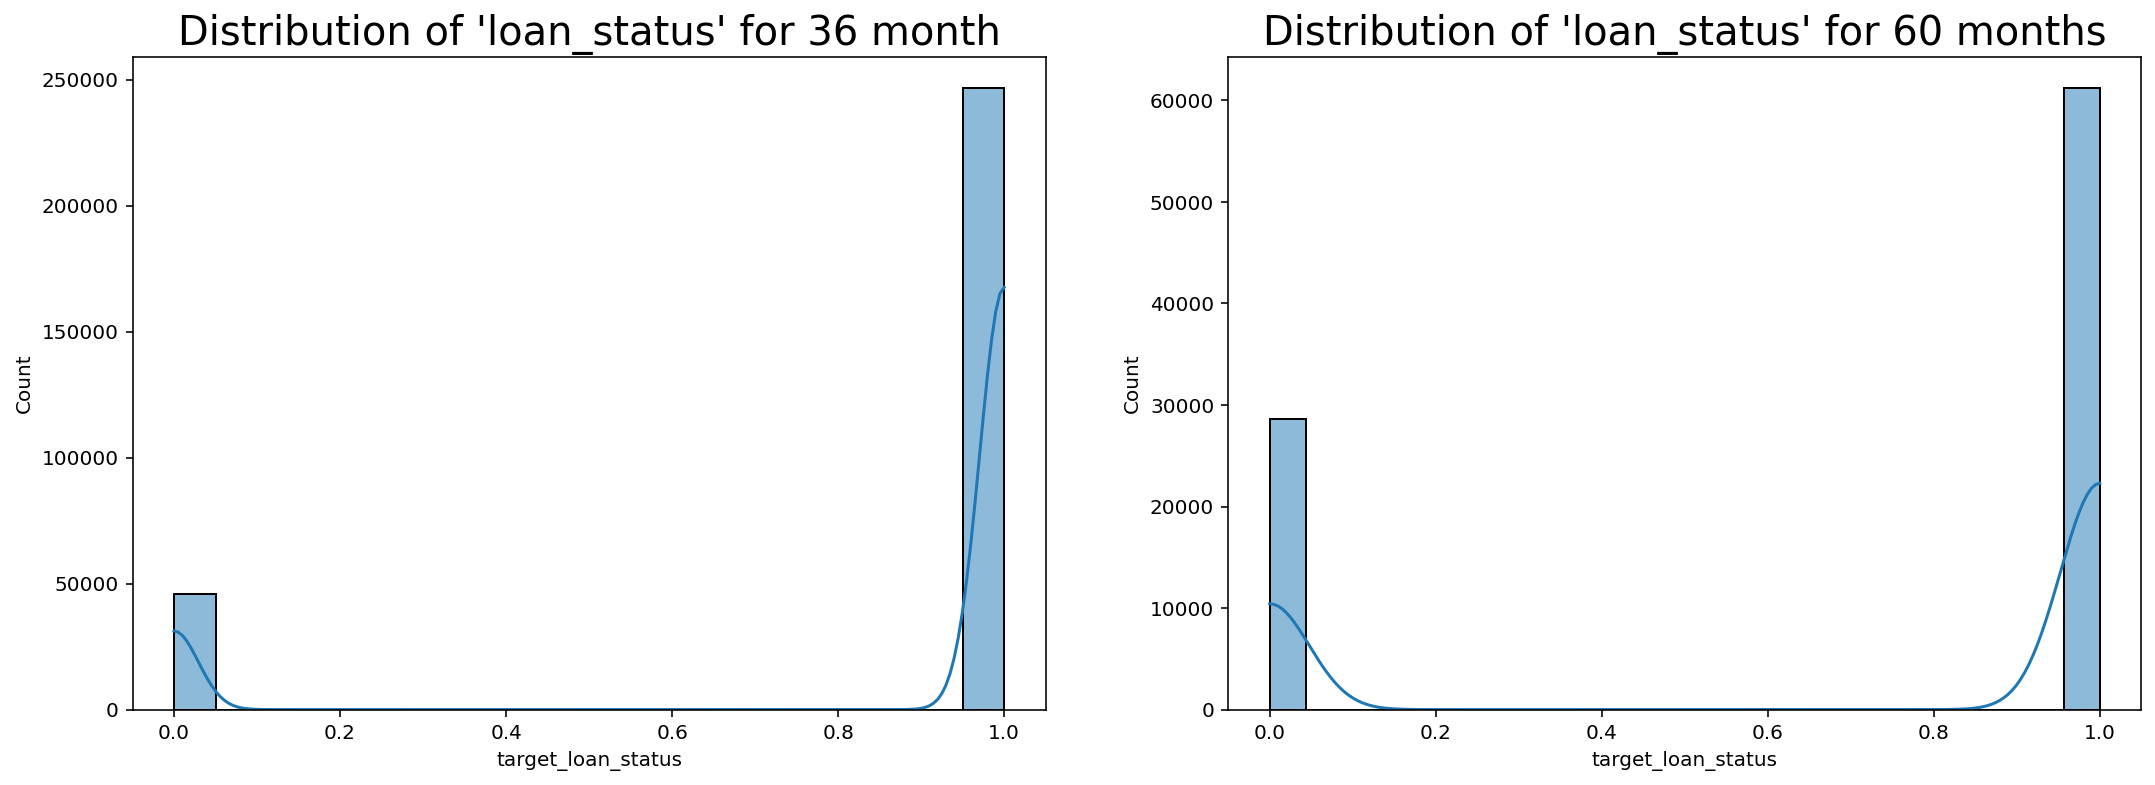

In [34]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
sns.histplot(term_36, kde=True, ax=axes[0]).set_title("Distribution of 'loan_status' for 36 month", fontsize=20)
sns.histplot(term_60, kde=True, ax=axes[1]).set_title("Distribution of 'loan_status' for 60 months", fontsize=20)
plt.show()

We can see that the , target_loan status - fully paid of 60 months is less than the 36 months

## Distibution of data for loan status - fully paid , and charged off

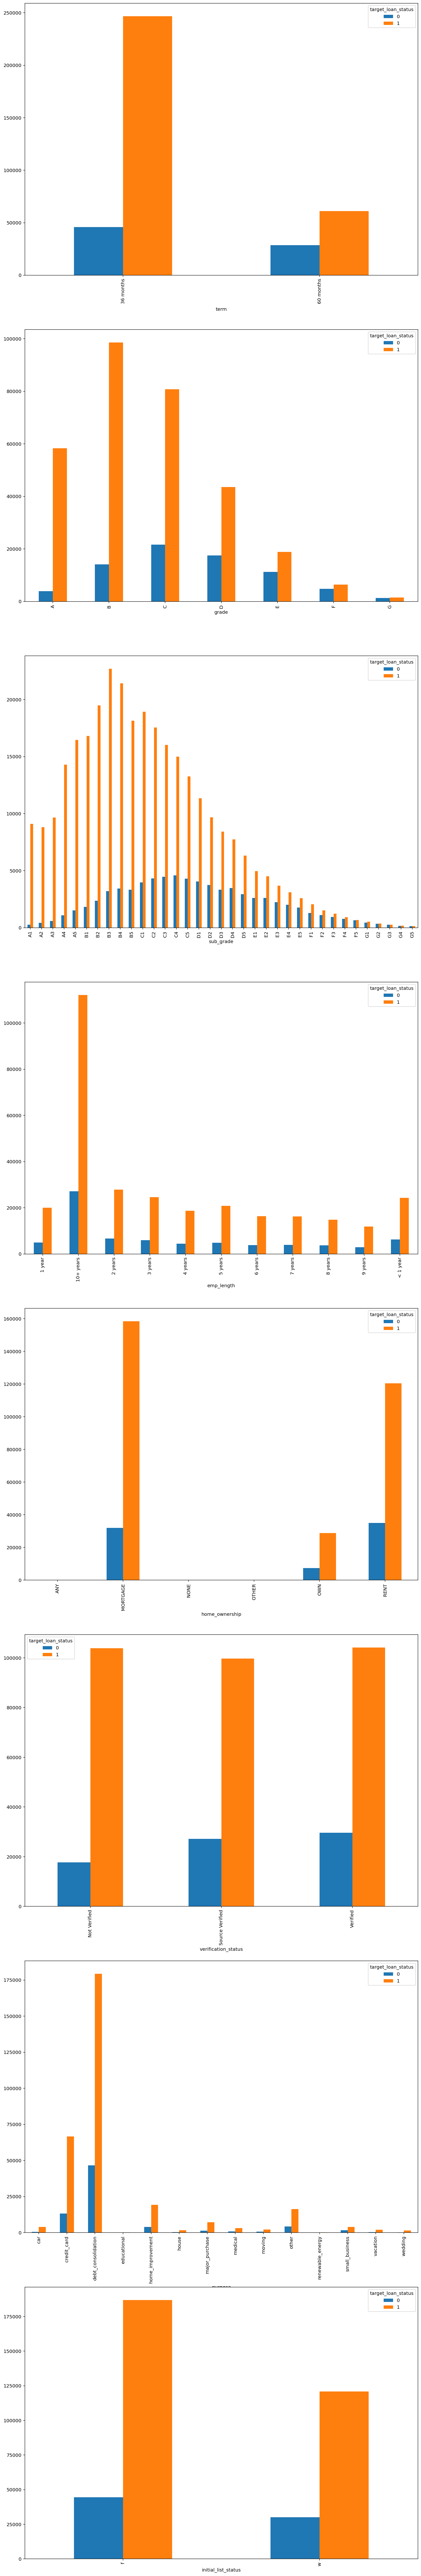

In [35]:
#Seperating Independent and Target Feature
df_target = df_a['target_loan_status']
df_ind = df_a.drop(columns=['target_loan_status'])

#Seperating Categorical Feature
df_ind_cat = df_ind.select_dtypes(include='object')

#Seperating Numerical Feature
df_ind_num = df_ind.select_dtypes(include=np.number)

fig, axs = plt.subplots(8,1)
k = 0
for i in range(8):
    if k == 8:
        break
    else:
        pd.crosstab(df_ind_cat.iloc[:,k],df_target).plot(kind='bar',ax=axs[i],figsize=(15,100))
        k=k+1


- We can see that the 10+ years loans are fully paid , and the count is more than the other
- initial_list status - 1 is more than 0
- For Verification status. , debt consolidation category is has more fully paid off loan status 
- We can also seem that Not verified , and verified ,loan paid is more than other category
- Subgrade B3 has more fully paid loans and subgrade C4 has more chanrged off loan status 
- Similarly Grade B has more fully paid loan status and grade C has more chargrd off loan status

## Feature Engineering

### Categorical feature encoding and Train test split

We can further do the feature engineering , like , feature scaling , categorical values encoding

In [36]:
dff=df.copy()
Y = dff['target_loan_status']
dff.drop(columns=['target_loan_status'], inplace=True)
X = dff
target_variable = Y
numerical_dup = dff.select_dtypes(include=[np.number])
categorical_dup = dff.select_dtypes(include=[np.object]).drop(columns=['address','issue_d','sub_grade','earliest_cr_line','title'])
LE = LabelEncoder()
for i in categorical_dup.columns:
    categorical_dup[i] = LE.fit_transform(categorical_dup[i].astype(str))
independent_var = pd.concat(objs=[numerical_dup,categorical_dup],axis=1)
target_variable = pd.get_dummies(target_variable,drop_first=True)
target_variable.value_counts()

X_train, X_test, y_train, y_test = train_test_split(independent_var, target_variable, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(f"Number of rows in train data = {X_train.shape[0]}")
print(f"Number of rows in CV data = {X_cv.shape[0]}")
print(f"Number of rows in test data = {X_test.shape[0]}")


1
1    307816
0     74541
dtype: int64

Number of rows in train data = 244708
Number of rows in CV data = 61177
Number of rows in test data = 76472


In [37]:
independent_var.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'term', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type'],
      dtype='object')

In [38]:
independent_var

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,pub_rec_bankruptcies,term,grade,emp_title,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,0.0,0,1,78911,1,5,0,12,1,1
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,...,0.0,0,1,32481,4,1,0,2,0,1
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,...,0.0,0,1,123897,10,5,1,1,0,1
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,...,0.0,0,0,27097,6,5,0,1,0,1
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,...,0.0,1,2,37333,9,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,...,0.0,1,1,156370,2,5,1,2,1,1
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,...,0.0,0,2,5622,5,1,1,2,0,1
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,...,0.0,0,1,25520,1,5,2,2,0,1
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,...,0.0,1,2,55199,1,1,2,2,0,1


### Encoding numerical variables

In [40]:
df['pub_rec']= df['pub_rec'].apply(lambda x: 1 if x>1.0 else 0)
df['mort_acc']= df['mort_acc'].apply(lambda x: 1 if x>1.0 else 0)
df['pub_rec_bankruptcies']= df['pub_rec_bankruptcies'].apply(lambda x: 1 if x>1.0 else 0)

## Feature Selection

In [41]:
def get_scores(model,proba):
    pred = model.predict(X_test)
    scores = {'Accuracy':round(accuracy_score(Y_test,pred),2),
              'Precision':round(precision_score(Y_test,pred,average='macro'),2),
              'Recall':round(recall_score(Y_test,pred,average='macro'),2),
              'f1-Score':round(f1_score(Y_test,pred,average='macro'),2),
              'ROC-AUC Socre':round(roc_auc_score(Y_test,proba),2)
             }
    return scores
def get_train_scores(train_model,proba):
    pred = train_model.predict(X_train)
    scores = {'Accuracy':round(accuracy_score(Y_train,pred),2),
              'Precision':round(precision_score(Y_train,pred,average='macro'),2),
              'Recall':round(recall_score(Y_train,pred,average='macro'),2),
              'f1-Score':round(f1_score(Y_train,pred,average='macro'),2),
              'ROC-AUC Socre':round(roc_auc_score(Y_train,proba),2)
             }
    return scores

### Cheking Variance influence factor for numerical variables

In [42]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(dff[num_cols].values,i)  for  i in range(dff[num_cols].shape[1])]
vif['Features'] = dff[num_cols].columns
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,44.852410,installment
1,44.693219,loan_amnt
2,12.870875,open_acc
3,11.774250,total_acc
4,9.671078,int_rate
5,6.987543,dti
6,6.824064,revol_util
7,3.012910,annual_inc
8,2.234805,pub_rec_bankruptcies
9,2.211627,mort_acc


From above, we can verify that the high influenced featurtes like installment , loan_amt, open_Acc, total_Acc should be removed

### Using RFE - Recursive feature selection

In [43]:
# create model and select features
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_train,y_train)

# view selected features
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 10
Selected Features: [False False False False  True False  True False False False  True  True
  True  True False False  True  True False  True  True]
Feature Ranking: [ 9  2  8 10  1  3  1 12  7  4  1  1  1  1 11  6  1  1  5  1  1]


In [44]:
f= list(zip(X_train.columns,rfe.support_,rfe.ranking_))
f

[('loan_amnt', False, 9),
 ('int_rate', False, 2),
 ('installment', False, 8),
 ('annual_inc', False, 10),
 ('dti', True, 1),
 ('open_acc', False, 3),
 ('pub_rec', True, 1),
 ('revol_bal', False, 12),
 ('revol_util', False, 7),
 ('total_acc', False, 4),
 ('mort_acc', True, 1),
 ('pub_rec_bankruptcies', True, 1),
 ('term', True, 1),
 ('grade', True, 1),
 ('emp_title', False, 11),
 ('emp_length', False, 6),
 ('home_ownership', True, 1),
 ('verification_status', True, 1),
 ('purpose', False, 5),
 ('initial_list_status', True, 1),
 ('application_type', True, 1)]

In [45]:
rfe_features=[]
for i in range(0,len(f)):
  if f[i][1]==True:
    rfe_features.append(f[i][0])

In [46]:
rfe_features

['dti',
 'pub_rec',
 'mort_acc',
 'pub_rec_bankruptcies',
 'term',
 'grade',
 'home_ownership',
 'verification_status',
 'initial_list_status',
 'application_type']

## Function to calculate score

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

features-  int_rate,dti,open_Acc,mort_Acc,term,grade,home_ownership,verification_status, initial_list_Status,application_type

## Hypothesis Testing

### Chi Square

In [48]:
alpha = 0.05
dependent=[]
columns=rfe_features
for cols in columns:
   s= pd.crosstab(df[cols], df["target_loan_status"])
   print(cols,"vs target_loan_status")
   print()
   print("--"*25)
   p_val = chi2_contingency(s)[1]
   print(cols,":::::  P-Val::::",p_val)
   print("--"*25)
   if p_val <= alpha:
     print("Since p-value is less than alpha . we reject null hypothesis. ie)", cols,"and target_loan_status- these two features are dependent✅")
     dependent.append(cols)
     print()
   else:
     print("P-value is high , we fail to reject hypothesis . ie)",cols,"and target_loan_status- these two features are not dependent❌")

dti vs target_loan_status

--------------------------------------------------
dti :::::  P-Val:::: 0.0
--------------------------------------------------
Since p-value is less than alpha . we reject null hypothesis. ie) dti and target_loan_status- these two features are dependent✅

pub_rec vs target_loan_status

--------------------------------------------------
pub_rec :::::  P-Val:::: 7.555826255146879e-16
--------------------------------------------------
Since p-value is less than alpha . we reject null hypothesis. ie) pub_rec and target_loan_status- these two features are dependent✅

mort_acc vs target_loan_status

--------------------------------------------------
mort_acc :::::  P-Val:::: 5.0475069932426724e-241
--------------------------------------------------
Since p-value is less than alpha . we reject null hypothesis. ie) mort_acc and target_loan_status- these two features are dependent✅

pub_rec_bankruptcies vs target_loan_status

------------------------------------------

AS we can see from the above hypothesis testing , features such as term, int_rate , pub_rec,target_loan_status,grade,emp_title,home_ownership,verification_status,initial_list_status,application_type

In [49]:
rfe_features

['dti',
 'pub_rec',
 'mort_acc',
 'pub_rec_bankruptcies',
 'term',
 'grade',
 'home_ownership',
 'verification_status',
 'initial_list_status',
 'application_type']

## Base Model- after labelencoding -Logistic Regression

We can split the dataset , into train , test and CV(For cross validation). WE will be testing the model , only after getting the good model score for CV and train

In [52]:
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_variable, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(f"Number of rows in train data = {X_train.shape[0]}")
print(f"Number of rows in CV data = {X_cv.shape[0]}")
print(f"Number of rows in test data = {X_test.shape[0]}")

from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)
model_prob = model.predict_proba(X_train)


Number of rows in train data = 244708
Number of rows in CV data = 61177
Number of rows in test data = 76472


LogisticRegression()

In [53]:
model.intercept_

array([0.00128642])

In [54]:
model.coef_

array([[-9.11943134e-05, -7.19270547e-03,  2.20267394e-03,
         1.22947696e-05,  3.20842236e-03,  7.68504062e-03,
        -8.41262436e-05, -1.94049107e-06,  1.21232015e-03,
         2.32933870e-02,  2.83261307e-03,  1.13818122e-04,
        -9.16805410e-04, -5.31310864e-03,  2.02679631e-06,
         4.84310875e-03,  2.25753603e-03, -2.81321991e-04,
         1.92752971e-03,  3.87862140e-04,  1.29591656e-03]])

In [55]:
model_prob

array([[0.26018147, 0.73981853],
       [0.28504111, 0.71495889],
       [0.26833325, 0.73166675],
       ...,
       [0.34579561, 0.65420439],
       [0.13431057, 0.86568943],
       [0.3392551 , 0.6607449 ]])

In [56]:
print(f'Train Accuracy:{model.score(X_train,y_train)}') 

Train Accuracy:0.8048449580724782


## Model with RFE Selected features

In [57]:
X_train, X_test, y_train, y_test = train_test_split(independent_var[rfe_features], target_variable, test_size=0.2, random_state=0)
X_train_rfe, X_cv_rfe, y_train_rfe, y_cv_rfe = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(f"Number of rows in train data = {X_train_rfe.shape[0]}")
print(f"Number of rows in CV data = {X_cv_rfe.shape[0]}")
print(f"Number of rows in test data = {X_test.shape[0]}")

from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)
model_prob = model.predict_proba(X_train)


Number of rows in train data = 244708
Number of rows in CV data = 61177
Number of rows in test data = 76472


LogisticRegression()

In [58]:
print(f'Train Accuracy:{model.score(X_train_rfe,y_train_rfe)}')

Train Accuracy:0.8059360543995292


In [59]:
## Train vs Cross validation results
print_score(model, X_train_rfe, y_train_rfe, X_cv_rfe, y_cv_rfe, train=True)
print_score(model, X_train_rfe, y_train_rfe, X_cv_rfe, y_cv_rfe, train=False)

Train Result:
Accuracy Score: 80.59%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.515579       0.814160  0.805936       0.664869       0.755960
recall         0.072853       0.983427  0.805936       0.528140       0.805936
f1-score       0.127666       0.890824  0.805936       0.509245       0.742068
support    47699.000000  197009.000000  0.805936  244708.000000  244708.000000
_______________________________________________
Confusion Matrix: 
 [[  3475  44224]
 [  3265 193744]]

Test Result:
Accuracy Score: 80.48%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.517282      0.812871  0.804763      0.665077      0.754881
recall         0.072321      0.983528  0.804763      0.527925      0.804763
f1-score       0.126901      0.890093  0.804763      0.508

In [60]:
## Train vs test data results
print_score(model, X_train_rfe, y_train_rfe, X_test, y_test, train=True)
print_score(model, X_train_rfe, y_train_rfe, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.59%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.515579       0.814160  0.805936       0.664869       0.755960
recall         0.072853       0.983427  0.805936       0.528140       0.805936
f1-score       0.127666       0.890824  0.805936       0.509245       0.742068
support    47699.000000  197009.000000  0.805936  244708.000000  244708.000000
_______________________________________________
Confusion Matrix: 
 [[  3475  44224]
 [  3265 193744]]

Test Result:
Accuracy Score: 80.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.513152      0.814912  0.806661      0.664032      0.756353
recall         0.072305      0.983483  0.806661      0.527894      0.806661
f1-score       0.126750      0.891297  0.806661      0.509

## Model with Statsmodels library

In [61]:
import statsmodels.api as sm


# Add a constant to the independent variable
X_train_sm = sm.add_constant(X_train_rfe)

# Create a logistic regression model
model = sm.Logit(y_train_rfe, X_train_sm)

# Fit the model
result = model.fit()

# Print the summary of the model's statistics
print(result.summary())

# Print the coefficients and p-values
print(result.params)
print(result.pvalues)

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                           Logit Regression Results                           
Dep. Variable:                      1   No. Observations:               244708
Model:                          Logit   Df Residuals:                   244697
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 Feb 2023   Pseudo R-squ.:                     inf
Time:                        07:43:22   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3573      0.170     13.860      0.000       2.024       2.691
dti                     -0.0297      0.001    -44.907      0.000      -0.031      -0.028
pub_rec     

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



## Model with Standard scaler

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_rfe)

X_train_ss = scaler.transform(X_train_rfe)
X_cv_ss = scaler.transform(X_cv_rfe)
X_test_ss = scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train_ss, y_train_rfe)
model_prob = model.predict_proba(X_train)

StandardScaler()

LogisticRegression()

In [63]:
# print X_train
X_train_ss

array([[ 1.94701314, -0.32761169, -0.35247528, ..., -1.26293594,
         1.23720167, -0.02447086],
       [-1.50430865, -0.32761169, -0.84103923, ..., -0.03854673,
        -0.80827567, -0.02447086],
       [-1.16723162,  1.49731893,  1.11321655, ...,  1.18584247,
         1.23720167, -0.02447086],
       ...,
       [ 0.61605458, -0.32761169, -0.35247528, ...,  1.18584247,
        -0.80827567, -0.02447086],
       [-0.15847904, -0.32761169, -0.84103923, ..., -1.26293594,
         1.23720167, -0.02447086],
       [ 1.27285908, -0.32761169, -0.35247528, ...,  1.18584247,
        -0.80827567, -0.02447086]])

In [64]:
print(f'Train Accuracy:{model.score(X_train_ss,y_train_rfe)}, Val Accuracy:{model.score(X_cv_ss,y_cv_rfe) }' ) 

Train Accuracy:0.8060259574676758, Val Accuracy:0.8047468819981366


In [65]:
y_train_rfe.shape

(244708, 1)

In [66]:
## Train vs cross validation data results
print_score(model, X_train_ss, y_train_rfe, X_cv_ss, y_cv_rfe, train=True)
print_score(model, X_train_ss, y_train_rfe, X_cv_ss, y_cv_rfe, train=False)

Train Result:
Accuracy Score: 80.60%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.517486       0.814066  0.806026       0.665776       0.756256
recall         0.071972       0.983752  0.806026       0.527862       0.806026
f1-score       0.126369       0.890901  0.806026       0.508635       0.741877
support    47699.000000  197009.000000  0.806026  244708.000000  244708.000000
_______________________________________________
Confusion Matrix: 
 [[  3433  44266]
 [  3201 193808]]

Test Result:
Accuracy Score: 80.47%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.517158      0.812773  0.804747      0.664966      0.754778
recall         0.071571      0.983691  0.804747      0.527631      0.804747
f1-score       0.125741      0.890101  0.804747      0.507

In [67]:
## Train vs test data results
print_score(model, X_train_ss, y_train_rfe, X_test_ss, y_test, train=True)
print_score(model, X_train_ss, y_train_rfe, X_test_ss, y_test, train=False)

Train Result:
Accuracy Score: 80.60%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.517486       0.814066  0.806026       0.665776       0.756256
recall         0.071972       0.983752  0.806026       0.527862       0.806026
f1-score       0.126369       0.890901  0.806026       0.508635       0.741877
support    47699.000000  197009.000000  0.806026  244708.000000  244708.000000
_______________________________________________
Confusion Matrix: 
 [[  3433  44266]
 [  3201 193808]]

Test Result:
Accuracy Score: 80.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.514355      0.814787  0.806714      0.664571      0.756486
recall         0.071226      0.983807  0.806714      0.527517      0.806714
f1-score       0.125126      0.891355  0.806714      0.508

# Hyperparameter tuned model

In [68]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train_rfe, y_train_rfe)
  train_score = scaled_lr.score(X_train_rfe, y_train_rfe)
  val_score = scaled_lr.score(X_cv_rfe, y_cv_rfe)
  train_scores.append(train_score)
  val_scores.append(val_score)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=100.0))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.00999900009999))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0049997500124993755))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0033332222259258026))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.002499937501562461))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.001999960000799984))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0016666388893518441))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0014285510206997042))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0012499843751953101))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0011110987655692714))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.000999990000099999))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00090908264470323))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0008333263889467588))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0007692248521165222))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0007142806122813408))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0006666622222518516))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.000624996093774414))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0005882318339303887))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0005555524691529492))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.000526313019405161))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0004999975000124999))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0004761882086275779))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0004545433884391434))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0004347807183447028))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0004166649305627893))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00039999840000639995))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0003846139053311333))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0003703689986333384))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0003571415816372084))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0003448263971503546))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0003333322222259259))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0003225796045819207))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00031249902344055174))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0003030293847594401))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00029411678200946464))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00028571346939008745))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00027777700617498283))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00027026953981205455))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0002631572022178889))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0002564095989497463))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0002499993750015625))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00024390184414184354))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0002380946712031638))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0002325575987032588))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00022727221074497558))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0002222217283961591))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00021739083175906137))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0002127655047542452))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00020833289930645977))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00020408121616078334))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001999996000008))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00019607804690579037))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001923073224859183))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00018867888928511455))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00018518484225029213))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00018181785124027046))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00017857110969444698))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00017543828870475664))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00017241349583880028))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001694912381504438))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00016666638888935184))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00016393415748498772))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00016129006243538317))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00015872990677792575))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00015624975585975647))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00015384591716012744))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00015151492194708795))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00014925350857685287))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.000147058607266754))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00014492732619228089))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00014285693877580174))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00014084487204947597))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00013888869598792223))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00013698611371765245))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00013513495252033441))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00013333315555579258))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00013157877423845496))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00012986996120784258))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00012820496383978994))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00012658211825048322))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001249998437501953))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00012345663770785468))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00012195107079137709))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00012048178255206921))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00011904747732443176))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00011764692041538774))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00011627893455937841))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00011494239661793492))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00011363623450427897))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00011235942431525357))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00011111098765445816))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00010988998913188007))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00010869553402659344))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001075267661002515))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00010638286555014303))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00010526304709152938))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00010416655815983525))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00010309267722404409))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00010204071220335489))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.00010100999897979901))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.99999000001e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.900980296059112e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.803911956949062e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.70872843812773e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.615375369831375e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.523800453523377e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.433953364194939e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.345785658144245e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.259250685878995e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.174303509813293e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.090900826453795e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=9.009000892791989e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=8.92856345663977e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=8.84954969066399e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=8.771922129892868e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=8.695644612482946e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=8.620682223549807e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=8.547001241879281e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=8.474569089348229e-05))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=8.40335428289556e-05))])

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Regularization Parameter(λ)')

Text(0, 0.5, 'Accuracy')

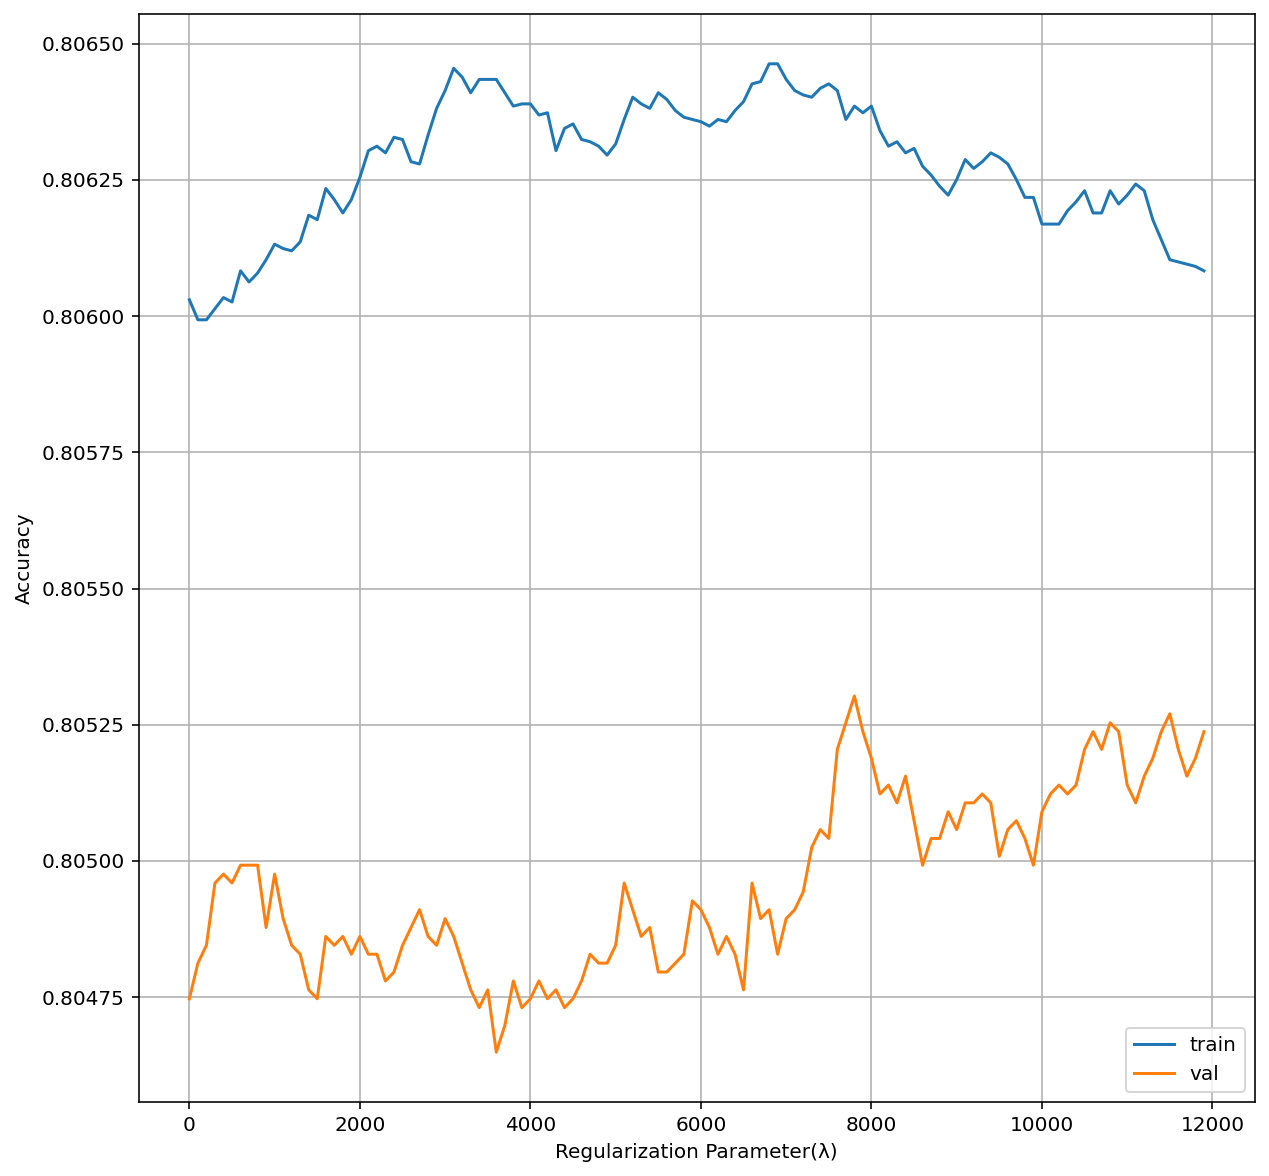

In [85]:

plt.figure(figsize=(10, 10))
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

### Getting the max val_Score

In [70]:
value=np.argmax(val_scores)
value

78

In [71]:
val_scores[value]

0.805302646419406

In [72]:
l_best = 0.01 * value * 100

In [73]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train_rfe, y_train_rfe)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01282051282051282))])

In [74]:
scaled_lr.named_steps['logisticregression'].coef_

array([[-0.23923857, -0.05170448,  0.11974963,  0.02631233, -0.1781734 ,
        -0.48862194, -0.12343605, -0.04197526, -0.00911993,  0.0210757 ]])

In [75]:
scaled_lr.named_steps['logisticregression'].intercept_

array([1.56792976])

## Now test this best model on our test data

In [76]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.806674338319908


## Confusion matrix

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Confusion matrix')

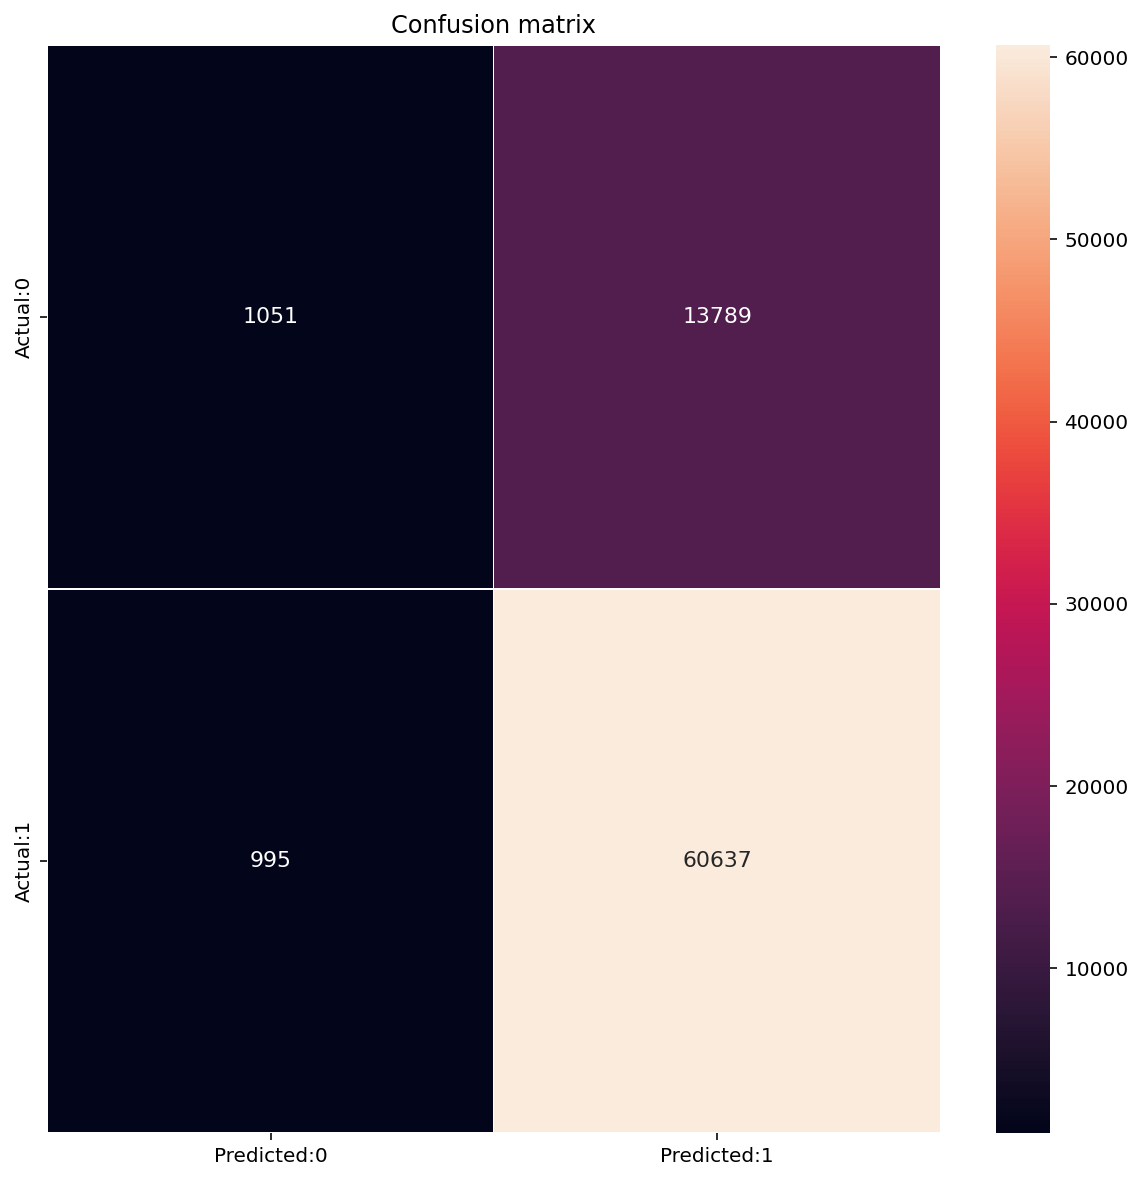

In [87]:
baselog_predict = scaled_lr.predict(X_test)
train_log_pred_prob = scaled_lr.predict_proba(X_train_rfe)
test_log_pred_prob = scaled_lr.predict_proba(X_test)
cm = confusion_matrix(y_test,baselog_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cbar = True,linewidths = 0.1, annot_kws = {'size':11},fmt='d')

plt.title("Confusion matrix")
plt.show()



The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

True Positives: 60637

True Negatives: 1051

False Positives: 13789 (Type I error)

False Negatives: 995 ( Type II error)

In [89]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("sensitivity:",sensitivity)
print("specificity:",specificity)

sensitivity: 0.9838557892004154
specificity: 0.07082210242587601


## Model Evaluation

In [90]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.806674338319908 
 The Missclassification = 1-Accuracy =  0.19332566168009202 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9838557892004154 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.07082210242587601 
 Positive Predictive value = TP/(TP+FP) =  0.814728723833069 
 Negative predictive Value = TN/(TN+FN) =  0.5136852394916911 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.0588454501221383 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.227954413192993


From the above statistics it is clear that the model is highly specific than Sensitive. The Positive values are predicted more accurately than the Negatives.

In [78]:
## Train vs test data results
print_score(scaled_lr, X_train_rfe, y_train_rfe, X_test, y_test, train=True)
print_score(scaled_lr, X_train_rfe, y_train_rfe, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.60%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.517294       0.814002   0.80601       0.665648       0.756167
recall         0.071490       0.983848   0.80601       0.527669       0.806010
f1-score       0.125619       0.890903   0.80601       0.508261       0.741732
support    47699.000000  197009.000000   0.80601  244708.000000  244708.000000
_______________________________________________
Confusion Matrix: 
 [[  3410  44289]
 [  3182 193827]]

Test Result:
Accuracy Score: 80.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.513685      0.814729  0.806674      0.664207      0.756309
recall         0.070822      0.983856  0.806674      0.527339      0.806674
f1-score       0.124482      0.891340  0.806674      0.507

## ROC Curve, Precision Score

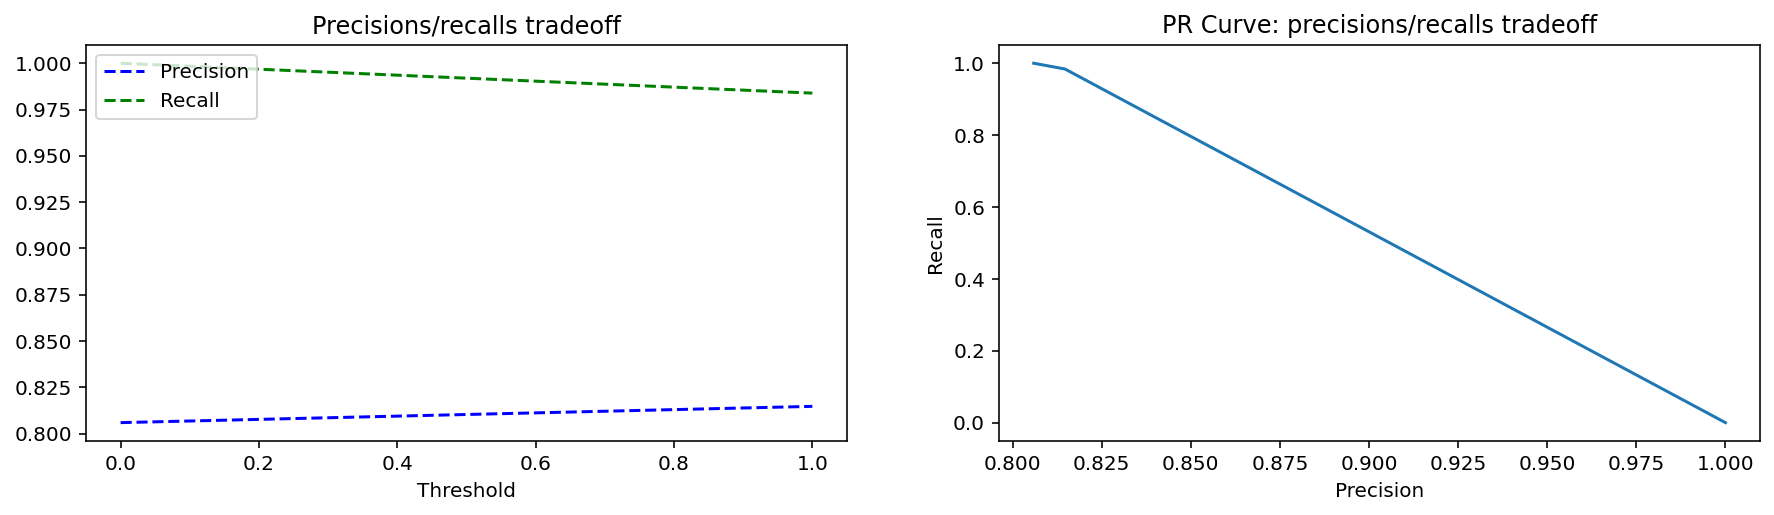

In [79]:
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, scaled_lr.predict(X_test))
pr_auc = auc(recalls, precisions)
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

### ROC Curve

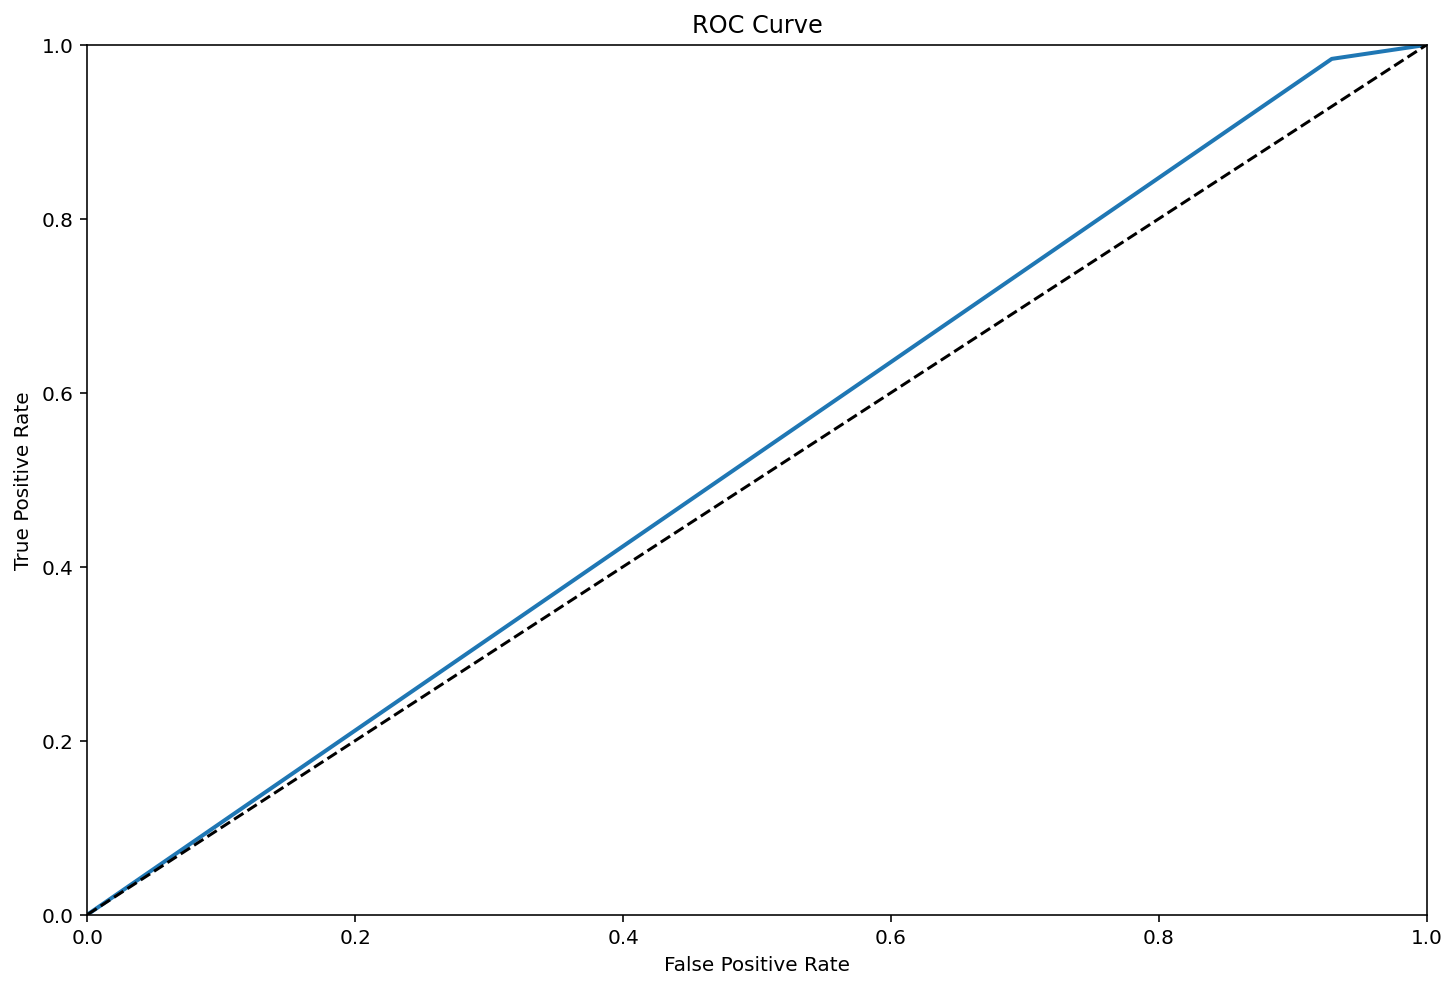

In [80]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, scaled_lr
                                 .predict(X_test))
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

## ROC_AUC_Score

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, scaled_lr.predict(X_test))

0.5273389458131458

Since the data is imbalanced , so , we can consider , Precision AUC Score(pr_auc)

## Precision Score

In [82]:
print("PR AUC score: ", pr_auc)

PR AUC score:  0.9057979056432199


    Tradeoff Questions:
        How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. (10 Points)
        Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)

Actionable Insights & Recommendations (10 Points)


Questionnaire (Answers should present in the text editor along with insights):

    What percentage of customers have fully paid their Loan Amount?
    Comment about the correlation between Loan Amount and Installment features.
    The majority of people have home ownership as _______.
    People with grades ‘A’ are more likely to fully pay their loan. (T/F)
    Name the top 2 afforded job titles.
    Thinking from a bank's perspective, which metric should our primary focus be on..
        ROC AUC
        Precision
        Recall
        F1 Score
    How does the gap in precision and recall affect the bank?
    Which were the features that heavily affected the outcome?
    Will the results be affected by geographical location? (Yes/No)


What percentage of customers have fully paid their Loan Amount? - 
**- 80% of customers has fully paid loans**




Comment about the correlation between Loan Amount and Installment features.

-  high multicollinearity between these two features. This in turn resulted in high VIF value (i.e. 11.91).
So dropping this feature for model feature selection



The majority of people have home ownership as _______.

- MORTAGE is the majority of people's home ownership


People with grades ‘A’ are more likely to fully pay their loan. (T/F)


- Yes, , Peeple with grade A are more  likely to have fully paid loans, and got their loan approved


Name the top 2 afforded job titles.

- Teacher & Manage


Thinking from a bank's perspective, which metric should our primary focus be on..
   
  - ROC-AUC : Not good metric to consider as we have highly imbalanced data.
 - Precision: Consider when only want to reduce NPA
    Recall: Consider when we do not want to miss good opportunity for providing loan to customer
  - F1-score: Good metric for us, because we want to consider both Precision and Recall.

  So good metric is F1-score



How does the gap in precision and recall affect the bank?



-  If Recall value is low (i.e. FN are high), it means Bank is loosing in opportunity cost.

-  If Precision value is low (i.e. FP are high), it means Bank's NPA (defaulters) may increase.





Which were the features that heavily affected the outcome?




['dti',
 'pub_rec',
 'mort_acc',
 'pub_rec_bankruptcies',
 'term',
 'grade',
 'home_ownership',
 'verification_status',
 'initial_list_status',
 'application_type']



Will the results be affected by geographical location? (Yes/No)

- Yes, as we can see there are more count of pincode : 70466 present in dataset

#OBSERVATIONS



-  We can see that 80% of customers have fully paid their loan amount 
- There are more data related to fully paid than charged off
- There are 396030 rows present in dataset
- In dataset , we can see that the 36 months term category loans are brought more than 60 months
- In dataset , Grade , B is more , and second highest is C
- In dataset , the sub grade B3 is more in count , terms of data
- In dataset , the emp_length of 10+ years is more in dates
- Also the distribution of loan_amnt is right skewed normal distribution
- And Total_Acc data follows normal distribution
- Verified  , and not verified loan has high fully paid count
- The debt_consolidation category has more fully paid loans history
- Initial_list_status has highest fully paid count with f category
- With simple hypothesis testing , we are able to get the dependent features
- We got 80% score for test data, after scaling and hyperparameter tuned mode

# Recommendations

- To keep very less False Positives, oversampling techniques like SMOTE should be used in model creation. Also we can use more complex algorithms like SVM, Decision-Trees, Random Forest and also try various hyperparameter tunning.

-  As you can see from the data, the percentage of defaulters is slightly higher than Banking industry.

- If Recall value is low (i.e. FN are high), it means Bank is loosing in opportunity cost.

- If Precision value is low (i.e. FP are high), it means Bank's NPA (defaulters) may increase.

- WE still need more data for model creation with more features

- In our model , we can see the False positve is high , making the model has highly specific

- Accuracy of our model is 80% , and with this , we can easily identify the person trappable to loan defaulters 